In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder , StandardScaler , MinMaxScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# data = pd.read_csv('C:\\DATA SCIENCE\\Assignment\\Data\\Netflix\\credits.csv')

In [3]:
data2 = pd.read_csv('C:\\DATA SCIENCE\\Assignment\\Data\\Netflix\\titles.csv')

In [4]:
# data.head(3)

In [5]:
data2.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300


In [6]:
data2.tail(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


In [7]:
data2.shape

(5850, 15)

In [8]:
data2.sample()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
337,tm86189,Good Luck Chuck,MOVIE,"Cursed since childhood, dentist Charlie Logan ...",2007,NaN,101,"['comedy', 'romance']","['US', 'CA']",NaN,tt0452625,5.6,90212.0,30.423,5.9


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [10]:
data2.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [11]:
data2.isnull().sum()*100/len(data2)

id                       0.000000
title                    0.017094
type                     0.000000
description              0.307692
release_year             0.000000
age_certification       44.769231
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.000000
imdb_id                  6.888889
imdb_score               8.239316
imdb_votes               8.512821
tmdb_popularity          1.555556
tmdb_score               5.316239
dtype: float64

In [12]:
data2['seasons'].unique()

array([ 1., nan,  4.,  9., 24.,  5., 39., 10., 13., 42., 25., 21., 37.,
        8., 29.,  7., 11., 14., 12.,  6., 32., 15., 19.,  2., 20.,  3.,
       16.])

In [13]:
data2.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [14]:
data2['seasons'].median()

np.float64(1.0)

<Axes: xlabel='seasons'>

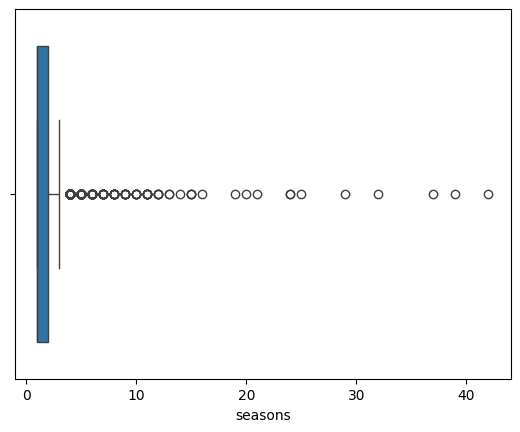

In [15]:
sns.boxplot(x = data2['seasons'])

In [16]:
# Q1 = data2['seasons'].quantile(0.25)
# Q3 = data2['seasons'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data2= data2[(data2['seasons'] >= lower_bound) & (data2['seasons'] <= upper_bound)]

In [17]:
Q1 = data2['seasons'].quantile(0.25)
Q3 = data2['seasons'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR




data2['seasons'] = data2['seasons'].where(
    (data2['seasons'] >= lower_bound) & (data2['seasons'] <= upper_bound), 
    other=np.nan
)

In [18]:
data2['seasons'] = data2['seasons'].fillna(data2['seasons'].median())


<Axes: xlabel='seasons'>

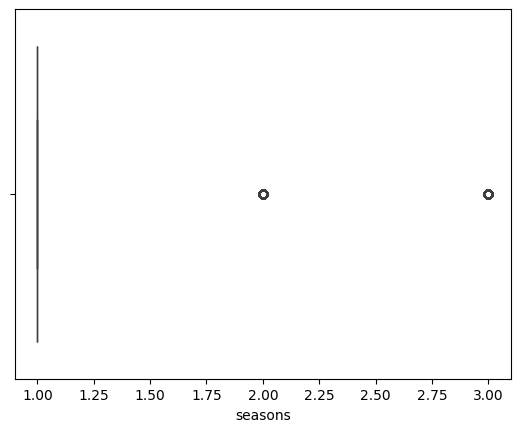

In [19]:
sns.boxplot(x = data2['seasons'])

In [20]:
data2.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,5850.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,1.130427,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,0.421163,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,1.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,3.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [21]:
data2['seasons'].median()

np.float64(1.0)

In [22]:
# data2['seasons'] = data2['seasons'].fillna(data2['seasons'].median())

In [23]:
data2['seasons'] = data2['seasons'].astype('int64')

In [24]:
data2['imdb_votes'].value_counts()

imdb_votes
25.0       11
6.0        11
78.0        9
14.0        9
195.0       8
           ..
9643.0      1
12251.0     1
1882.0      1
1484.0      1
3402.0      1
Name: count, Length: 3880, dtype: int64

In [25]:
data2['imdb_votes'].median()

np.float64(2233.5)

In [26]:
data2['imdb_votes'].mean()

np.float64(23439.382473841553)

In [27]:
data2['imdb_votes'].min()

np.float64(5.0)

In [28]:
data2['imdb_votes'].max()

np.float64(2294231.0)

<Axes: xlabel='imdb_votes'>

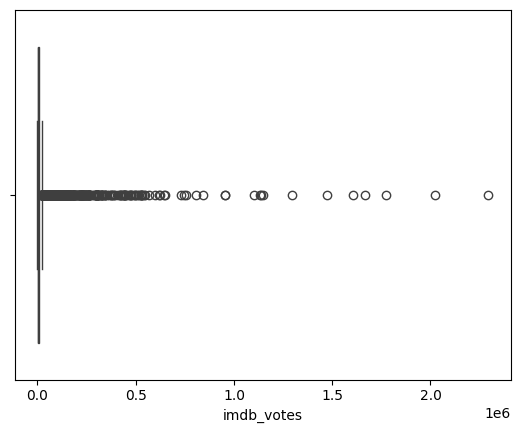

In [29]:
sns.boxplot(x = data2['imdb_votes'])

In [30]:
# Q1 = data2['imdb_votes'].quantile(0.25)
# Q3 = data2['imdb_votes'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data2= data2[(data2['imdb_votes'] >= lower_bound) & (data2['imdb_votes'] <= upper_bound)]


In [31]:
Q1 = data2['imdb_votes'].quantile(0.25)
Q3 = data2['imdb_votes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



data2['imdb_votes'] = data2['imdb_votes'].where(
    (data2['imdb_votes'] >= lower_bound) & (data2['imdb_votes'] <= upper_bound), 
    other=np.nan
)

In [32]:
data2['imdb_votes'] = data2['imdb_votes'].fillna(data2['imdb_votes'].median())

<Axes: xlabel='imdb_votes'>

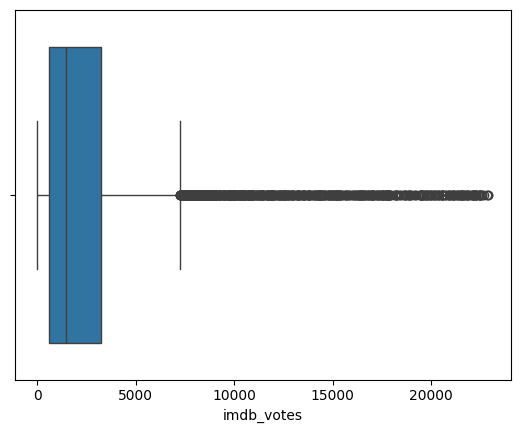

In [33]:
sns.boxplot(x = data2['imdb_votes'])

In [34]:
data2['imdb_votes'].median()

np.float64(1481.5)

In [35]:
data2['imdb_votes'].mean()

np.float64(3086.74358974359)

In [36]:
data2.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,5850.000000,5368.000000,5850.000000,5759.000000,5539.000000
mean,2016.417094,76.888889,1.130427,6.510861,3086.743590,22.637925,6.829175
std,6.937726,39.002509,0.421163,1.163826,4385.264176,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,604.250000,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,1481.500000,6.821000,6.900000
75%,2020.000000,104.000000,1.000000,7.300000,3256.750000,16.590000,7.537500
max,2022.000000,240.000000,3.000000,9.600000,22894.000000,2274.044000,10.000000


In [37]:
# data2['imdb_votes'] = data2['imdb_votes'].fillna(data2['imdb_votes'].median())

In [38]:
data2['imdb_votes'] = data2['imdb_votes'].astype('int64')

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               5850 non-null   int64  
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5850 non-null   int64  
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(3), int64(

In [40]:
data2.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                  403
imdb_score               482
imdb_votes                 0
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [41]:
data2['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

<Axes: xlabel='age_certification'>

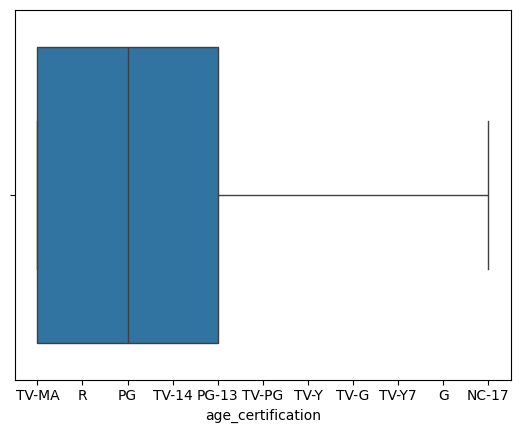

In [42]:
sns.boxplot( x = data2['age_certification'])

In [43]:
data2['age_certification'] = data2['age_certification'].fillna(data2['age_certification'].mode()[0])

In [44]:
data2.isnull().sum()

id                        0
title                     1
type                      0
description              18
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 403
imdb_score              482
imdb_votes                0
tmdb_popularity          91
tmdb_score              311
dtype: int64

In [45]:
data2['title'].unique()

array(['Five Came Back: The Reference Films', 'Taxi Driver',
       'Deliverance', ..., 'Lokillo',
       'Dad Stop Embarrassing Me - The Afterparty',
       'Mighty Little Bheem: Kite Festival'], dtype=object)

In [46]:
data2['title']= data2['title'].fillna(data2['title'].mode()[0])

In [47]:
data2.sample()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4288,tm851499,Vir Das: For India,MOVIE,From the Vedas to Vasco de Gama to vacuous Bol...,2020,TV-MA,75,['comedy'],['IN'],1,tt11611314,7.7,1260,2.277,8.3


In [48]:
data2 = data2.drop(columns=['id', 'description', 'imdb_id'])


In [49]:
data2.sample()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3650,Hyperdrive,SHOW,2019,TV-PG,48,['reality'],['US'],1,NaN,1481,6.122,7.5


In [50]:
data2.isnull().sum()

title                     0
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              482
imdb_votes                0
tmdb_popularity          91
tmdb_score              311
dtype: int64

In [51]:
data2.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,5850.000000,5368.000000,5850.000000,5759.000000,5539.000000
mean,2016.417094,76.888889,1.130427,6.510861,3086.630940,22.637925,6.829175
std,6.937726,39.002509,0.421163,1.163826,4385.305423,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,604.250000,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,1481.000000,6.821000,6.900000
75%,2020.000000,104.000000,1.000000,7.300000,3256.750000,16.590000,7.537500
max,2022.000000,240.000000,3.000000,9.600000,22894.000000,2274.044000,10.000000


In [52]:
data2['imdb_score'] = data2['imdb_score'].fillna(data2['imdb_score'].median())

In [53]:
data2['tmdb_popularity'] = data2['tmdb_popularity'].fillna(data2['tmdb_popularity'].median())

In [54]:
data2['tmdb_score'] = data2['tmdb_score'].fillna(data2['tmdb_score'].median())

In [55]:
data2.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [56]:
data2.sample()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5735,Masameer County,SHOW,2021,TV-MA,21,[],['SA'],1,6.6,1481,2.122,8.0


# 1.	What were the top 10 movies according to IMDB score?

In [57]:
movies_df = data2[data2['type'] == 'MOVIE']

top_10_movies = movies_df.sort_values(by='imdb_score', ascending=False).head(10)


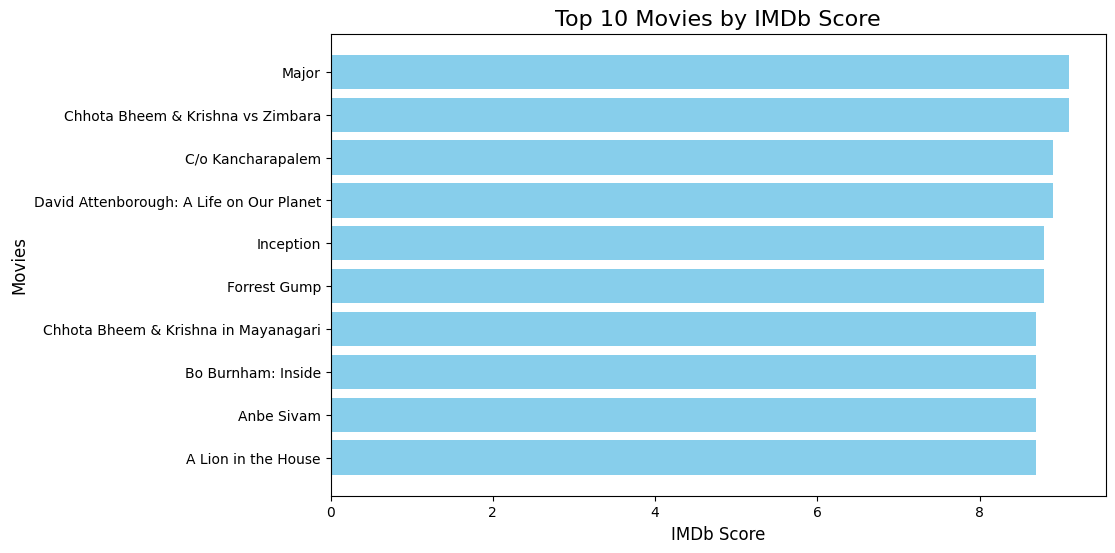

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['title'], top_10_movies['imdb_score'], color='skyblue')
plt.title('Top 10 Movies by IMDb Score', fontsize=16)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Movies', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()

# 2.	What were the top 10 shows according to IMDB score?

In [59]:
shows_df = data2[data2['type'] == 'SHOW']

top_10_shows = shows_df.sort_values(by='imdb_score', ascending=False).head(10)


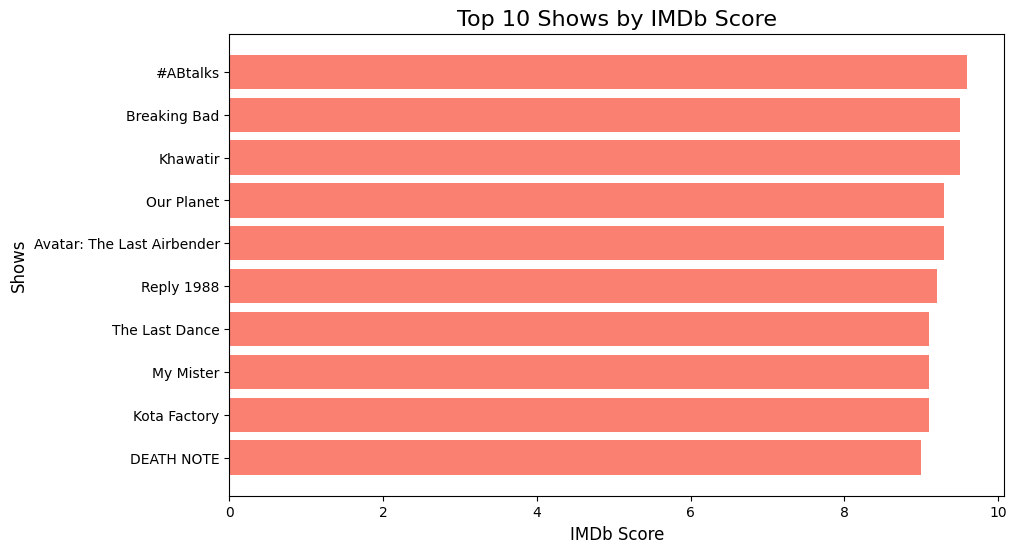

In [60]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_shows['title'], top_10_shows['imdb_score'], color='salmon')
plt.title('Top 10 Shows by IMDb Score', fontsize=16)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Shows', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()


# 3 . What were the bottom 10 movies according to IMDB score?

In [61]:

bottom_10_movies = movies_df.sort_values(by='imdb_score', ascending=False).tail(10)


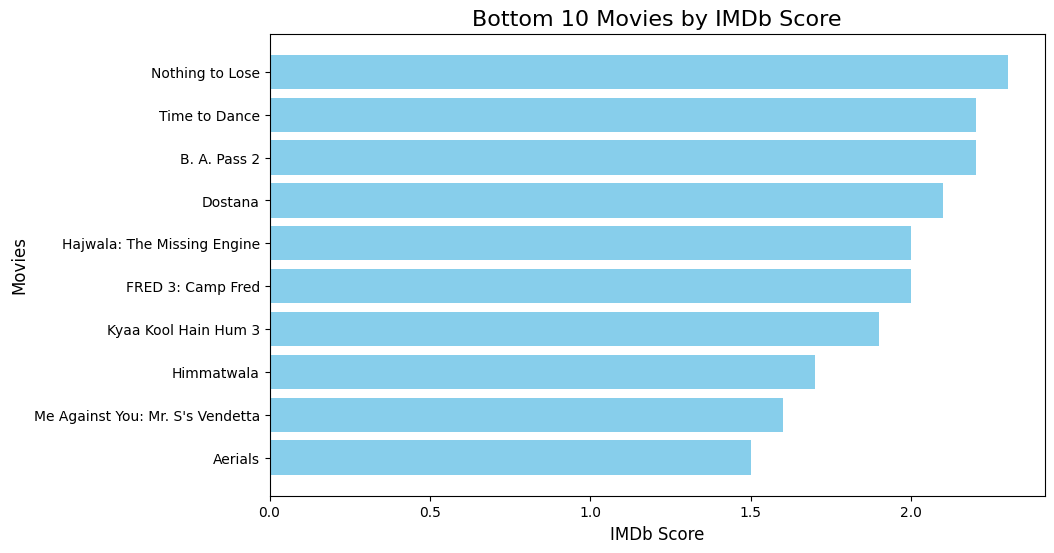

In [62]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_movies['title'], bottom_10_movies['imdb_score'], color='skyblue')
plt.title('Bottom 10 Movies by IMDb Score', fontsize=16)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Movies', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()

# 4.	What were the bottom 10 shows according to IMDB score?

<!-- 4.	What were the bottom 10 shows according to IMDB score? -->

In [63]:

bottom_10_shows = shows_df.sort_values(by='imdb_score', ascending=False).tail(10)


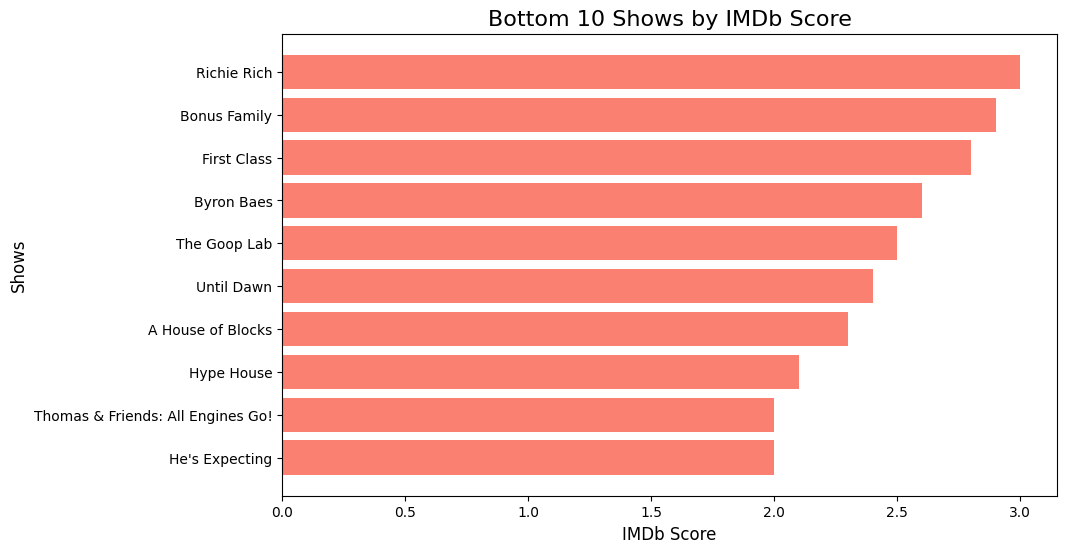

In [64]:
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_shows['title'], bottom_10_shows['imdb_score'], color='salmon')
plt.title('Bottom 10 Shows by IMDb Score', fontsize=16)
plt.xlabel('IMDb Score', fontsize=12)
plt.ylabel('Shows', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()

# 5.	What were the average IMDB and TMDB scores for shows and movies?

In [65]:
# average_scores_shows = shows_df[['imdb_score', 'tmdb_score']].mean().reset_index()
# average_scores_shows.columns = ['Score Type', 'Average Score']

In [66]:
# plt.figure(figsize=(8, 5))
# plt.bar(average_scores_shows['Score Type'], average_scores_shows['Average Score'], color=['skyblue', 'salmon'])
# plt.title('Average IMDb and TMDb Scores for Shows', fontsize=16)
# plt.xlabel('Score Type', fontsize=12)
# plt.ylabel('Average Score', fontsize=12)
# plt.show()

In [67]:
# average_scores_movies = movies_df[['imdb_score', 'tmdb_score']].mean().reset_index()
# average_scores_movies.columns = ['Score Type', 'Average Score']

In [68]:
# plt.figure(figsize=(8, 5))
# plt.bar(average_scores_movies['Score Type'], average_scores_movies['Average Score'], color=['skyblue', 'salmon'])
# plt.title('Average IMDb and TMDb Scores for Movies', fontsize=16)
# plt.xlabel('Score Type', fontsize=12)
# plt.ylabel('Average Score', fontsize=12)
# plt.show()

In [69]:
average_scores = data2.groupby('type')[['imdb_score', 'tmdb_score']].mean().reset_index()


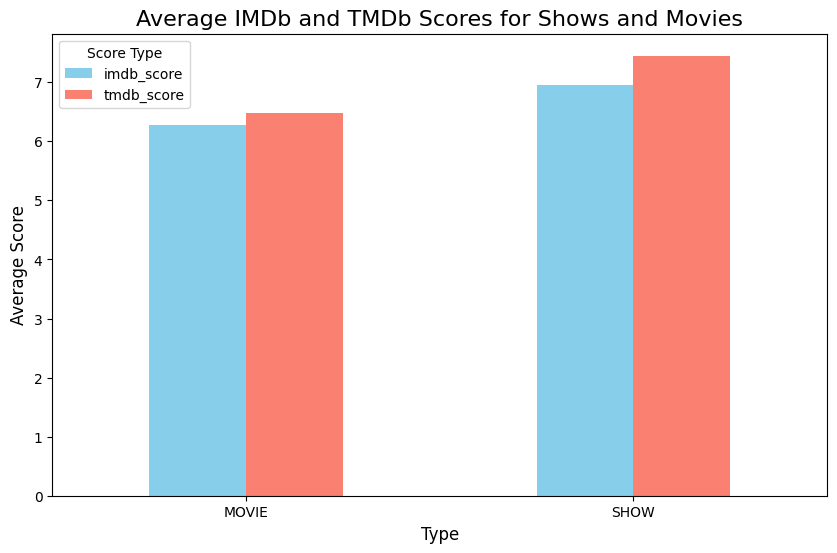

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))
average_scores.set_index('type').plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
plt.title('Average IMDb and TMDb Scores for Shows and Movies', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Score Type')

plt.show()

# 6.	What were the 5 most common age certifications for movies?

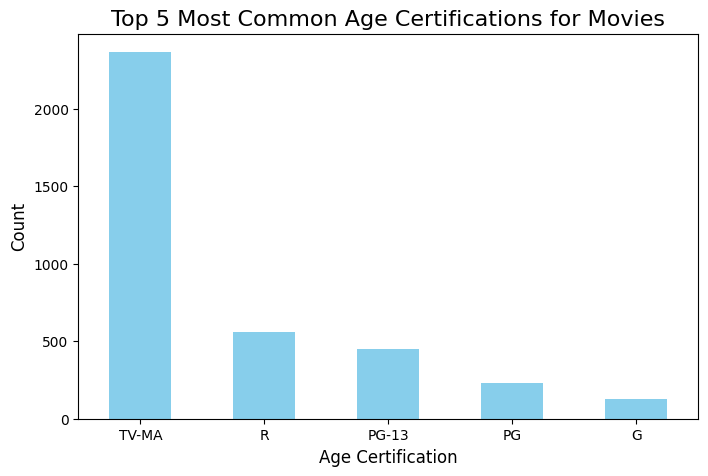

In [71]:
age_cert_counts = movies_df['age_certification'].value_counts().head(5)
plt.figure(figsize=(8, 5))
age_cert_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Age Certifications for Movies', fontsize=16)
plt.xlabel('Age Certification', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 7.	What were the top 3 most common genres in movies and shows?

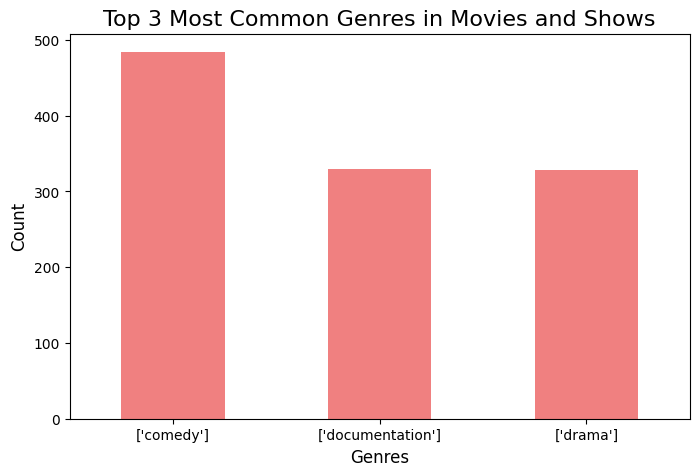

In [72]:
genre_counts = data2['genres'].value_counts().head(3)
plt.figure(figsize=(8, 5))
genre_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 3 Most Common Genres in Movies and Shows', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 8.	Production countries with the most movies and shows?

In [73]:
# country_counts = data2['production_countries'].value_counts().head(10)
# plt.figure(figsize=(8, 5))
# country_counts.plot(kind='bar', color='lightseagreen')
# plt.title('Production Countries with the Most Movies and Shows', fontsize=16)
# plt.xlabel('Production Countries', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

In [74]:
data2['production_countries'].unique()

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

In [75]:
data2['production_countries'] = data2['production_countries'].str.replace('[]' , data2['production_countries'].mode()[0])

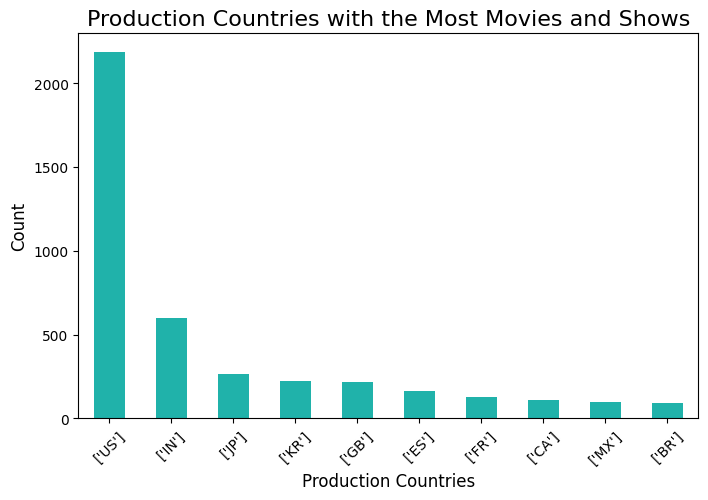

In [76]:
country_counts = data2['production_countries'].value_counts().head(10)
plt.figure(figsize=(8, 5))
country_counts.plot(kind='bar', color='lightseagreen')
plt.title('Production Countries with the Most Movies and Shows', fontsize=16)
plt.xlabel('Production Countries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 9.	What are top 10 shows with most seasons?

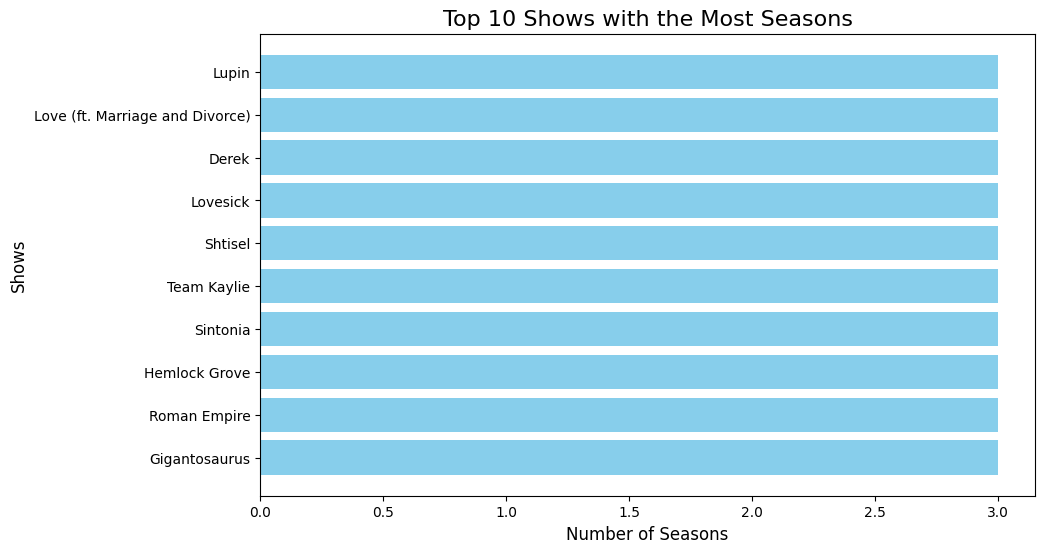

In [77]:
top_10_shows_seasons = shows_df.sort_values(by='seasons', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_shows_seasons['title'], top_10_shows_seasons['seasons'], color='skyblue')
plt.title('Top 10 Shows with the Most Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Shows', fontsize=12)
plt.gca().invert_yaxis()  # To display the highest season count at the top
plt.show()

In [78]:
data2['seasons'].unique()

array([1, 2, 3])

# 10.	Calculating the average runtime of movies and TV shows

In [79]:
average_runtime = data2.groupby('type')['runtime'].mean()


In [80]:
average_runtime

type
MOVIE    98.213675
SHOW     38.978158
Name: runtime, dtype: float64